In [1]:
from sympy import MatrixSymbol, BlockMatrix, ZeroMatrix, symbols, Identity, block_collapse
from sympy import DiagonalMatrix, init_printing, S, Matrix, eye
from sympy import cos, sin, tan, Dummy, I
from sympy import solve, sqrt, conjugate, fraction
from sympy.physics.quantum import Dagger
init_printing()

# One generation case

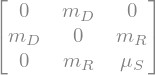

In [53]:
mD = symbols('m_D', real=True)
mR, muS = symbols('m_R mu_S', positive=True)
Mnu = Matrix(
    [[0, mD, 0],
     [mD, 0, mR],
     [0, mR, muS]]
)
Mnu

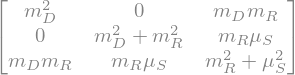

In [54]:
H = Mnu * Dagger(Mnu)
H

## Approximate eigenvalues

In [55]:
lamb = symbols(r'\lambda', real=True)
char_eq = H - lamb*eye(3)
char_eq = char_eq.det()
char_eq = char_eq.collect(lamb)
char_eq

In [121]:
# Now we make the approximation muS << mD << mR
char_eq_approx = char_eq.subs(
    {
        2*mD**2 + 2*mR**2 + muS**2: 2*mR**2,
        -mD**4 - 2*mD**2*mR**2 -2*mD**2*muS**2 - mR**4: -mR**4# - 2*mD**2*mR**2
    }
)
char_eq_approx

In [122]:
m1, m2, m3 = symbols(r'm_1 m_2 m_3', positive=True)
# In the inverse seesaw we have muS << mD << mR, also, m1 << m2 ~ m3
char_eq_approx1 = char_eq_approx.subs(lamb, m1**2)
# m1 << muS, then 
char_eq_approx1 = char_eq_approx1.replace(m1**6, 0).replace(m1**4, 0)
char_eq_approx1

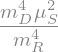

In [123]:
m1_approx_square = solve(char_eq_approx1, m1**2)[0]
m1_approx_square = m1_approx_square.simplify()
# but mD << mR, then
#m1_approx = m1_approx.subs(mD**2 + mR**2, mR**2)
m1_approx_square

In [124]:
char_eq_approx2 = char_eq_approx.collect(lamb, lambda x:x.factor())
char_eq_approx2

In [125]:
# m2 ~ m3 ~ mR, then the terms lam^3 + lamb*(mD**2 + mR**2) are dominant and we can ignore the term 
# proportional to muS
char_eq_approx2 = char_eq_approx2#.replace(muS, 0)
#char_eq_approx2 = char_eq_approx2.expand()
char_eq_approx2


In [127]:
mheavy = solve(char_eq_approx2.subs(muS,0), lamb)
mheavy

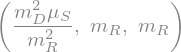

In [128]:
# the approximations are:
# m1 ~ (mD**2/mR**2)*muS
# m2 ~ -mR - (mD**2/2*mR)
# m3 ~  mR + (mD**2/2*mR)
m1_approx, m2_approx, m3_approx = sqrt(m1_approx_square), sqrt(mheavy[1]), sqrt(mheavy[1])
m1_approx, m2_approx, m3_approx

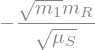

In [129]:
mD_sol = solve(m1_approx - m1, mD)[0]
mD_sol

In [130]:
mD_sol.subs({m1:1e-18, muS:1e-9, mR:1000})

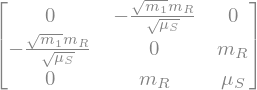

In [131]:
Mnu2 = Mnu.subs(mD, mD_sol)
Mnu2

## Approximate eigenvecs

In [146]:
# find eigenvectors
v1, v2, v3 = symbols(r'v_1 v_2 v_3')
eigen_eqs = H - lamb*eye(3)
eigen_eqs = eigen_eqs * Matrix([v1, v2, v3])
eigen_eqs = [eq.expand() for eq in eigen_eqs]
eigen_eqs

### light neutrino $\lambda = m_1$

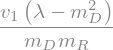

In [148]:
v3_sol = solve(eigen_eqs[0], v3)[0]
v3_sol

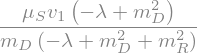

In [149]:
v2_sol = solve(eigen_eqs[1].subs(v3, v3_sol), v2)[0]
v2_sol

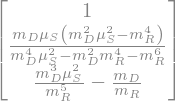

In [150]:
eigen1 = Matrix([v1, v2_sol, v3_sol]).subs(lamb, m1_approx_square).subs(v1,1)  # to avoid fractions
#eigen1 = eigen1 / sqrt(eigen1.dot(Dagger(eigen1)))
eigen1 = eigen1.applyfunc(lambda x: x.simplify())
eigen1

### Heavy neutrino $\lambda = m_2, m_3$

In [151]:
eigen_eqs

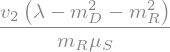

In [152]:
v3_sol2 = solve(eigen_eqs[1], v3)[0]
v3_sol2

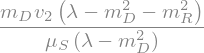

In [153]:
v1_sol2 = solve(eigen_eqs[0], v1)[0].subs(v3, v3_sol2)
v1_sol2

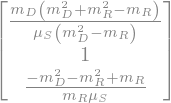

In [154]:
eigen2 = Matrix([v1_sol2, v2, v3_sol2]).subs(lamb, m2_approx).subs(v2, 1) # to avoid fractions
#eigen2 = eigen2 / sqrt(eigen2.dot(Dagger(eigen2)).simplify())
eigen2 = eigen2.applyfunc(lambda x: x.simplify())
eigen2

In [155]:
eigen_eqs

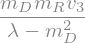

In [156]:
v1_sol3 = solve(eigen_eqs[0], v1)[0]
v1_sol3

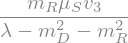

In [157]:
v2_sol3 = solve(eigen_eqs[1], v2)[0]
v2_sol3


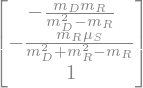

In [158]:
eigen3 = Matrix([v1_sol3, v2_sol3, v3]).subs(lamb, m3_approx).subs(v3, 1) # to avoid fractions
#eigen3 = eigen3 / sqrt(eigen3.dot(Dagger(eigen3)).simplify())
eigen3 = eigen3.applyfunc(lambda x: x.simplify())
eigen3

### Eigenvector matrix U 

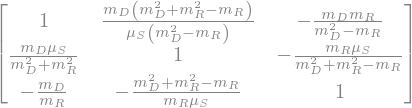

In [159]:
U = Matrix.hstack(eigen1, eigen2, eigen3)
U_approx = U.applyfunc(lambda x: x.series(muS, 0, 2).removeO().factor())
U_approx

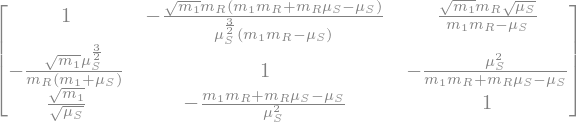

In [162]:
U_approx.subs(mD, mD_sol).applyfunc(lambda x: x.factor())

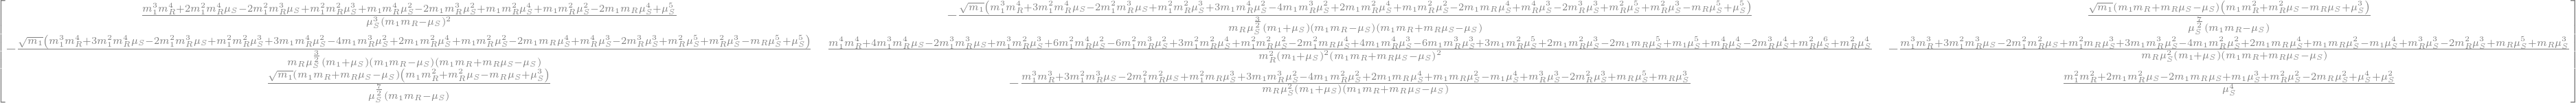

In [167]:
# unitary check
UU = U*Dagger(U)
UU_approx = U_approx*Dagger(U_approx)
UU_approx.subs(mD, mD_sol).applyfunc(lambda x: x.factor())

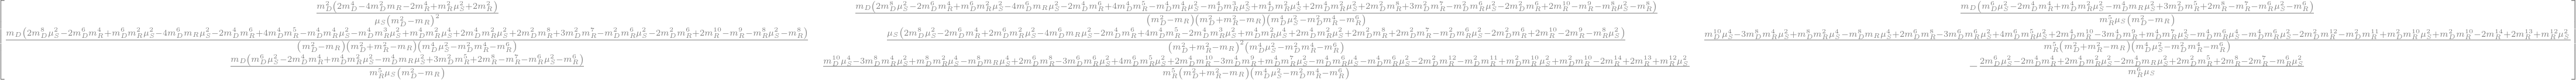

In [104]:
UMnuU = (U * Mnu * Dagger(U)).applyfunc(lambda x: x.factor())
UMnuU

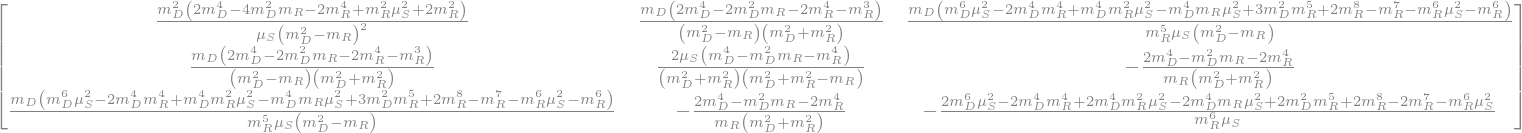

In [101]:
UMnuU_approx = UMnuU.applyfunc(lambda x: x.series(muS, 0, 2).removeO().factor())
UMnuU_approx

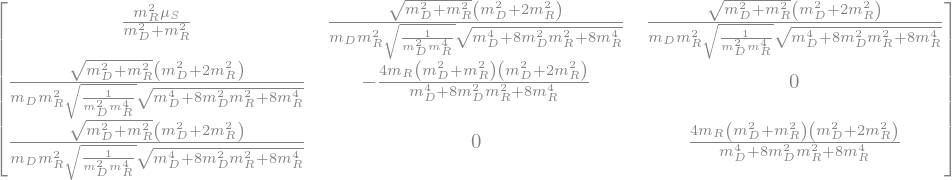

In [109]:
# replace muS = 0 in all entries exceprt in the (1,1) entry
for i in range(3):
    for j in range(3):
        if (i, j) != (0, 0):
            UMnuU_approx2[i, j] = UMnuU_approx2[i, j].subs(muS, 0).factor()
UMnuU_approx2

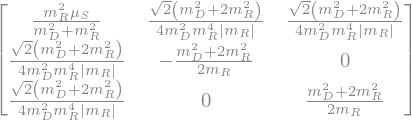

In [111]:
UMnuU_approx2.subs(mD**4 + 8*mD**2*mR**2 + 8*mR**4, (8*mR**4 + 8*mD**2*mR**2).factor()).subs(
    sqrt(1/(mD**2*mR**4)), 1/(1/(mD*mR**2))
)

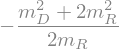

In [113]:
m2_approx.factor()

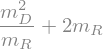

In [118]:
m3_approx - m2_approx

# Three generation case

In [4]:
n = 3
mD = MatrixSymbol('m_D', n,n)
MD = MatrixSymbol('M', n,n)
#MD = DiagonalMatrix(MD)
mu = MatrixSymbol(r'mu', n,n)
#mu = DiagonalMatrix(mu)
Z3 = ZeroMatrix(n,n)
I3 = Identity(n)
#epsilon = symbols(r'\epsilon', positive=True)

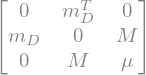

In [5]:
MLRiss_mDp0 = BlockMatrix(
    [
        [Z3, mD.T, Z3],
        [mD, Z3, MD],
        [Z3, MD, mu]
    ]
)
MLRiss_mDp0

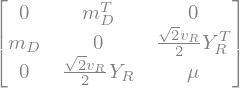

In [6]:
vR = symbols('v_R', positive=True)
YR = MatrixSymbol('Y_R', n,n)


MLRiss1 = BlockMatrix(
    [
        [Z3, mD.T, Z3],
        [mD, Z3, vR/sqrt(2)*YR.T],
        [Z3, vR/sqrt(2)*YR, mu]
    ]
)
MLRiss1

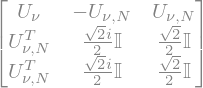

In [33]:
Unu = MatrixSymbol(r'U_{\nu}', n,n)
UnuN = MatrixSymbol(r'U_{\nu,N}', n,n)
U = BlockMatrix(
    [
        [Unu, -UnuN, UnuN],
        [UnuN.T, I/sqrt(2)*Identity(n), 1/sqrt(2)*Identity(n)],
        [UnuN.T, I/sqrt(2)*Identity(n), 1/sqrt(2)*Identity(n)]
    ]
)
U

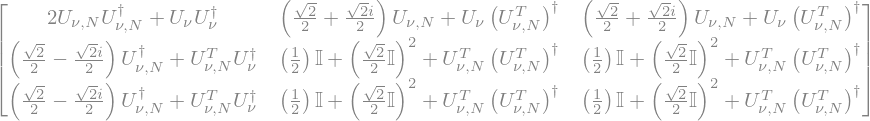

In [34]:
UDU = block_collapse(U*Dagger(U))
UDU

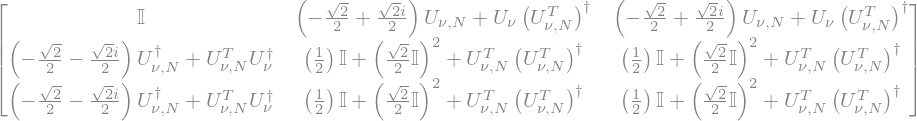

In [32]:
unitarity_eqs = {
    Unu*Dagger(Unu):I3/2,
    UnuN*Dagger(UnuN):I3/4,
    #UnuN.T*conjugate(UnuN):I3/4
}
block_collapse(UDU.subs(unitarity_eqs))

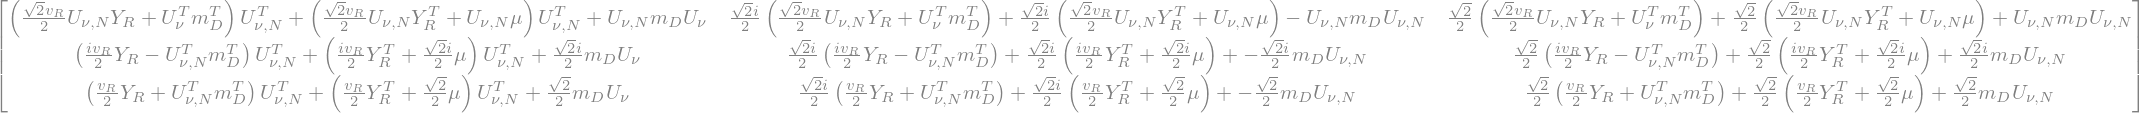

In [18]:
block_collapse(U.T*MLRiss1*U)

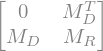

In [35]:
MD = MatrixSymbol('M_D', 6,3)
MR = MatrixSymbol('M_R', 6,6)
Mnu = BlockMatrix(
    [
        [Z3, MD.T],
        [MD, MR]
    ]
)
Mnu

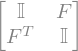

In [41]:
F = MatrixSymbol('F', 3,6)
I6 = Identity(6)
#W = BlockMatrix(
#    [
#        [I3 - S(1)/2*F*Dagger(F), F],
#        [Dagger(F), I6 - S(1)/2*Dagger(F)*F]
#    ]
#)
W = BlockMatrix(
    [
        [I3, F],
        [F.T, I6]
    ]
)
W
# The block sizes are:
# [ [3x3, 3x6],
#   [6x3, 6x6] ]
# This is valid for BlockMatrix in sympy.

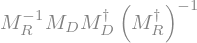

In [42]:
block_collapse((F*Dagger(F)).subs({F:MR.inv()*MD}))

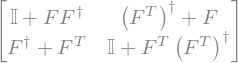

In [44]:
block_collapse(W*Dagger(W))

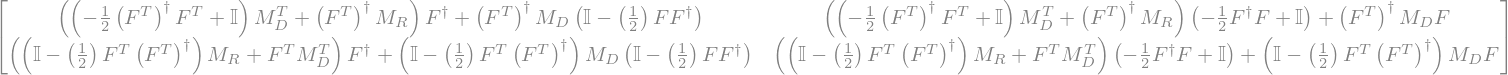

In [38]:
WMnuW = W.T*Mnu*W
WMnuW = block_collapse(WMnuW)
WMnuW

## Numeric implementation

Neutrino masses (eigenvalues) [GeV]:
[ 3.81401447e-16 -2.56394942e-15  4.92388950e-15 -1.00000001e+02
  1.00000001e+02 -2.00000000e+02  2.00000001e+02 -3.00000000e+02
  3.00000000e+02]

PMNS-like mixing submatrix (first 3x3 block of U):
[[ 0.99594849 -0.08726686  0.02170497]
 [-0.07746196 -0.70994984  0.69997918]
 [-0.04567554 -0.69882453 -0.71383332]]

Full mixing matrix U:
[[ 9.95948486e-01 -8.72668563e-02  2.17049746e-02  1.47313915e-13
  -1.47313914e-13  3.53553389e-05 -3.53553389e-05 -2.35702261e-05
  -2.35702261e-05]
 [-7.74619583e-02 -7.09949841e-01  6.99979183e-01 -7.07106774e-05
   7.07106773e-05  1.88515870e-13 -1.88682403e-13  2.35702260e-05
   2.35702260e-05]
 [-4.56755378e-02 -6.98824525e-01 -7.13833325e-01  7.07106772e-05
  -7.07106771e-05 -3.53553391e-05  3.53553391e-05  1.78367046e-14
   1.77807222e-14]
 [-3.16874738e-15 -1.02313453e-15  1.41160566e-13  7.07106781e-01
   7.07106781e-01 -2.35702269e-09 -2.35702258e-09 -8.83883522e-10
   8.83883466e-10]
 [-2.60286137e-14 

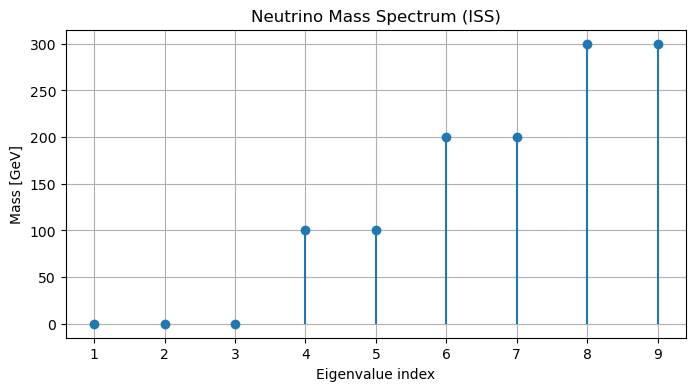

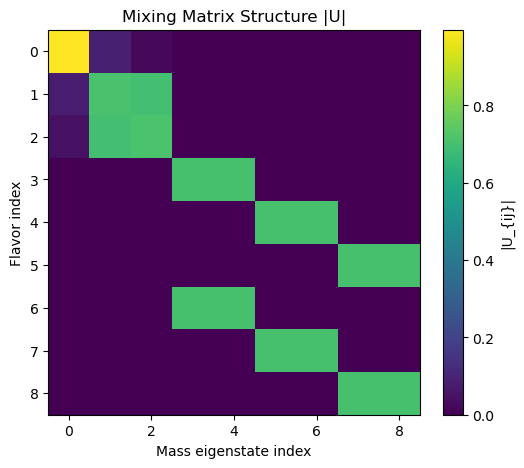

In [44]:
import numpy as np

import matplotlib.pyplot as plt

# --- Input parameters ---
n = 3  # Number of generations

# Dirac mass matrix m_D (anti-symmetric, 3x3)
mD_scale = 0.01  # GeV
m_D = mD_scale * np.array([
    [0,  1, -1],
    [-1, 0,  1],
    [1, -1, 0]
], dtype=float)

# Majorana mass matrix M (diagonal, non-degenerate, 3x3)
M_vals = np.array([100.0, 200.0, 300.0])  # GeV
M = np.diag(M_vals)

# μ matrix (symmetric, proportional to identity, 3x3)
mu0 = 1e-7  # GeV
mu = mu0 * np.eye(n)

# --- Construct full 9x9 ISS mass matrix ---
Z3 = np.zeros((n, n))
# Block structure: [[0, m_D.T, 0], [m_D, 0, M.T], [0, M, mu]]
Mnu = np.block([
    [Z3,      m_D.T, Z3],
    [m_D,     Z3,    M.T],
    [Z3,      M,     mu]
])

# --- Diagonalize the mass matrix ---
eigvals, eigvecs = np.linalg.eigh(Mnu)
# Sort by absolute value (lightest to heaviest)
idx = np.argsort(np.abs(eigvals))
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# --- Mixing matrix U ---
U = eigvecs  # Columns are eigenvectors

# --- Print results ---
print("Neutrino masses (eigenvalues) [GeV]:")
print(eigvals)
print("\nPMNS-like mixing submatrix (first 3x3 block of U):")
print(U[:3, :3])
print("\nFull mixing matrix U:")
print(U)

# --- Non-unitarity check ---
Minv = np.linalg.inv(M)
eta = 0.5 * m_D.T @ Minv @ Minv.T @ m_D
print("\nNon-unitarity parameter η ≈ ½ m_D† M⁻¹* M⁻¹ᵗ m_D:")
print(eta)

# --- Visualization ---
plt.figure(figsize=(8,4))
plt.stem(np.arange(1,10), np.abs(eigvals), basefmt=" ")
#plt.yscale('log')
plt.xlabel("Eigenvalue index")
plt.ylabel("Mass [GeV]")
plt.title("Neutrino Mass Spectrum (ISS)")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,5))
plt.imshow(np.abs(U), cmap='viridis', aspect='auto')
plt.colorbar(label='|U_{ij}|')
plt.title("Mixing Matrix Structure |U|")
plt.xlabel("Mass eigenstate index")
plt.ylabel("Flavor index")
plt.show()

# --- Easy parameter modification ---
# Change mD_scale, M_vals, mu0 above to explore different spectra!